<a href="https://colab.research.google.com/github/ceasarnjuguna/gun_firing_simulation/blob/master/GunFiringSimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.PROBLEM FORMULATION

The problem is to design and implement a simulation that can accurately model a bullet's trajectory and calculate its impact force on a target given varying conditions such as different firing angles, wind speeds, and target distances. The simulation should take into account the effects of gravity, air resistance, and wind.

The output of this simulation should provide insights into how changes in these parameters affect the bullet's trajectory and the force it impacts the target with. These results should then be visualized to help in understanding the dynamics involved in projectile motion under the aforementioned conditions.



#2. OBJECTIVES AND OVERALL PROJECT PLAN

##2.1 Objectives and Questions to be answered by system

1. To simulate the trajectory of a bullet consider factors like the firing angle, wind speed, bullet properties, and the effect of gravity and air resistance.

2. To calculate the impact force of the bullet on the target under various firing angles, wind speeds, and target distances.

3. To understand how changes in firing angle, wind speed, and target distance affect the trajectory of the bullet and its impact force.

4.  If the gun is fired at 90 degrees, does the bullet have enough force to hurt the shooter upon impact?


## 2.2 Project team

The group doing this study involved the following;

- Shirley Mbeyu Ddaiddo

- Allan Errissat Okedo

- Marion Cherotich Kipsang

- Ceasar Njuguna Ngunu

- Ashley Mbeke Muoki




#3.0 MODEL CONCEPTUALIZATION

In this section, we will provide an overview of the conceptual model behind the gun simulation. We will describe the key components and variables involved in the simulation and outline the assumptions made to simplify the model.

## 3.1 Model Equations
The simulation model above can be translated into mathematical language as follows:

1. The position of the bullet is represented by coordinates $(x, y)$, with $x$ being the horizontal distance and $y$ being the vertical distance.

2. The bullet is fired at an initial velocity, $v$, and an angle, $θ$, from the horizontal.

3. The bullet experiences gravity, which is a constant force acting downwards. This is represented by $g$, which is approximated as $9.81 m/s^2$.

4. The bullet also experiences air resistance, which is proportional to the square of its velocity and acts in the opposite direction of the bullet's motion. This is calculated using the drag equation:

$$ F_{drag} = 0.5 \cdot \text{air_density} \cdot \text{bullet_drag_coefficient} \cdot \text{bullet_area} \cdot v^2 $$

 $$ F_{drag} = \frac{\rho \cdot Cd \cdot A \cdot v^2}{2} $$

 and therefore the deceleration due to drag force is

 $$ a_{drag} = \frac{\rho \cdot Cd \cdot A \cdot v^2}{2m} $$

 where $m$ is the mass of the bullet.

5. Wind speed is taken into account, affecting the horizontal velocity of the bullet. The wind's effect is computed as the wind speed times the cosine of the difference between the wind direction and the bullet's direction of motion.

$$ ω = |V_w| ⋅ cos(θ_w - θ) $$

This way, when the wind direction is in the angle the bullet is fired, the wind speed contributes to the horizontal speed of the bullet maximally

$$ ω = |V_w| ⋅ cos(0), \quad \quad \quad θ_w = θ $$
$$ ω = |V_w| ⋅ 1 $$

when the wind direction is in the opposite angle to which the bullet is fired, the wind speed contributes to the horizontal speed of the bullet maximally but negatively

$$ ω = |V_w| ⋅ cos(π), \quad \quad \quad θ_w = θ+π $$
$$ ω = |V_w| ⋅ -1 $$

when the bullet is shot vertically upward, the wind does not impact the horizontal velocity of the bullet because there is none

$$ ω = |V_w| ⋅ cos(π/2), \quad \quad \quad θ_w = θ+π/2 $$
$$ ω = |V_w| ⋅ 0 = 0 $$

6. The model employs the Runge-Kutta order four method, a numerical integration technique, to solve the system of differential equations that describe the motion of the bullet:

 $$ \frac{dx}{dt} = v ⋅ cos(θ) + \text{wind_effect} $$

 $$ \frac{dy}{dt} = v ⋅ sin(θ) $$

 $$ \frac{dv}{dt} = -g ⋅ sin(θ) - \frac{F_{drag}}{\text{bullet mass}} $$

 $$ \frac{dθ}{dt} = -g ⋅ \frac{cos(θ)}{v} $$

 where $\frac{dx}{dt}$ and $\frac{dy}{dt}$ represent the bullet's horizontal and vertical velocities, $\frac{dv}{dt}$ is the rate of change of the bullet's speed, and $\frac{dθ}{dt}$ is the rate of change of the bullet's direction of motion.

 7. The Runge-Kutta method involves updating the variables $x, y, v,$ and $θ$ in small increments of time, $dt$, and computing the average rate of change over each time increment to approximate the continuous changes in these variables.

8. When the bullet's y-coordinate reaches zero, it is considered to have hit the ground. If the x-coordinate at this time is within the size of the target, it is considered to have hit the target.

9. The impact force on the target is calculated using Newton's second law, $F = \frac{Δp}{Δt}$, where $Δp$ is the change in the bullet's momentum and $Δt$ is a small increment of time.

10. The model is run for different values of firing angle, wind speed, and target distance, and the results are stored and later filtered based on the impact force.


## 3.2 Method of solution of the ODEs
The function runge_kutta_step() is used to compute the next step in the trajectory of the bullet by using the Runge-Kutta fourth-order method, which is a common algorithm used for numerically solving ordinary differential equations.

The function takes as input:

t - the current time,
dt - the time step,
x, y - the current position of the bullet,
v - the current velocity of the bullet,
θ - the current angle of the bullet trajectory,
wind_speed - the speed of the wind.

Inside the function, the Runge-Kutta method is applied in the following way:

1. The function calculate_derivatives() is called four times to calculate the so-called 'k' values, which are essentially estimates of the change in the variables (x, y, v, θ) over the time step dt. Each call to calculate_derivatives() uses different arguments to estimate the change at the beginning, middle, and end of the time step.

 - k1_x, k1_y, k1_v, k1_θ = calculate_derivatives(t, x, y, v, θ, wind_speed) - This line calculates the k1 values using the initial conditions at time t.

 - For k2 and k3, the estimates are calculated at the midpoint of the time interval (t + dt/2) using the initial conditions and the previous 'k' values.

 - For k4, the estimates are calculated at the end of the time interval (t + dt) using the initial conditions and the k3 values.
2. The new position (x, y), velocity (v), and angle (θ) are then calculated by  adding the weighted average of the 'k' values to the initial conditions. The weighting is done according to the standard Runge-Kutta method formula, which assigns more weight to the estimates at the midpoint of the interval (k2 and k3) than to the estimates at the beginning and end of the interval (k1 and k4).

3. Finally, the function returns the updated values of x, y, v, and θ.

   The result is a new estimate for the bullet's position, velocity, and angle at time t + dt that is more accurate than if we simply used the initial rate of change to estimate the new values. This makes the Runge-Kutta method a powerful tool for numerically solving differential equations in cases where an exact solution cannot be easily found.






## 3.3 Assumptions
a) Newtonian Physics: The model assumes Newtonian physics applies, which is a reasonable assumption for bullet trajectories at non-relativistic speeds.

b) Air Resistance: The model assumes that air resistance acts on the bullet. This is modelled as being proportional to the velocity of the bullet, which is a simplification. In reality, air resistance is a complex function of the speed, shape, and spin of the bullet, as well as atmospheric conditions.

c) Constant Wind Speed: The model takes a constant wind speed as input. In reality, wind speed can vary greatly over the trajectory of a bullet, both in magnitude and direction.

d) Gravity: The model assumes a constant gravitational acceleration. In reality, the force of gravity decreases slightly as the distance from the Earth's center increases, but this effect is negligible for the ranges at which bullets are typically fired.

e) Flat Earth: The model does not take into account the curvature of the Earth. For most practical purposes, this is an acceptable simplification, but for long-range ballistics, the Coriolis effect due to the rotation of the Earth can become significant.

f) No Bullet Spin: The model doesn't account for the gyroscopic effects caused by the spin of the bullet (rifling), which can stabilize the bullet and affect its trajectory.

g) Initial Conditions: The model assumes the initial position, velocity, and angle of the bullet are known and fixed.


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import json


#4.DATA COLLECTION

Data is being generated within the system

The simulation model above can be translated into mathematical language as follows:

1. The position of the bullet is represented by coordinates (x, y), with x being the horizontal distance and y being the vertical distance.

2. The bullet is fired at an initial velocity, v, and an angle, θ, from the horizontal.

3. The bullet experiences gravity, which is a constant force acting downwards. This is represented by g, which is approximated as 9.81 m/s^2.

4. The bullet also experiences air resistance, which is proportional to the square of its velocity and acts in the opposite direction of the bullet's motion. This is calculated using the drag equation:

 D = 0.5 * air_density * v^2 * bullet_drag_coefficient * bullet_area

5. Wind speed is taken into account, affecting the horizontal velocity of the bullet. The wind's effect is computed as the wind speed times the cosine of the difference between the wind direction and the bullet's direction of motion.

6. The model employs the Runge-Kutta method, a numerical integration technique, to solve the system of differential equations that describe the motion of the bullet:

 dx/dt = v * cos(θ) + wind_effect

 dy/dt = v * sin(θ)

 dv/dt = -g * sin(θ) - D / bullet_mass

 dθ/dt = -g * cos(θ) / v

 where dx/dt and dy/dt represent the bullet's horizontal and vertical velocities, dv/dt is the rate of change of the bullet's speed, and dθ/dt is the rate of change of the bullet's direction of motion.

7. The Runge-Kutta method involves updating the variables x, y, v, and θ in small increments of time, dt, and computing the average rate of change over each time increment to approximate the continuous changes in these variables.

8. When the bullet's y-coordinate reaches zero, it's considered to have hit the ground. If the x-coordinate at this time is within the size of the target, it's considered to have hit the target.

9. The impact force on the target is calculated using Newton's second law, F = Δp / Δt, where Δp is the change in the bullet's momentum and Δt is a small increment of time.

10. The model is run for different values of firing angle, wind speed, and target distance, and the results are stored and later filtered based on the impact force.



a) Constants;

Acceleration due to gravity (m/s^2) and air density at sea level and 15 degrees Celsius (kg/m^3)

In [1]:
g = 9.81
air_density = 1.225

b) Gun and bullet properties;

Height of the gun (m), initial speed of the bullet (m/s), mass of the bullet (kg), diameter of the bullet (m) and drag coefficient of the bullet (dimensionless). Finally, bullet's cross-sectional area is calculated.

In [3]:
gun_height = 1
initial_bullet_velocity = 350
bullet_mass = 0.117
bullet_diameter = 0.009
bullet_drag_coefficient = 0.05
bullet_area = math.pi * (bullet_diameter / 2)**2

c) Wind properties;

Speed of the wind (m/s) and Direction of the wind (radians)

In [4]:
wind_speeds = np.linspace(0, 20, 10)  # Range of wind speeds to simulate
wind_direction = math.radians(0)

d) Initial conditions; These are defined for

Firing angle (radians), horizantal posistion(m), vertical position (m), velocity (m/s), angle (radians) and time (s). The Time step (s) is also defined.

In [5]:
# Firing angles to simulate
firing_angles = np.radians(np.linspace(0, 90, 20))  # Range of firing angles to simulate

# Time settings
dt = 0.01  # Time step

e) Target properties;

Horizontal distance to the target (m) and Diameter of the target (m)

In [6]:
target_distances = np.linspace(0, 1000, 100)  # From 0 to 1000 meters
target_size = 1

# 5.MODEL TRANSLATION

This simulation is using python programming language and its related libraries as follows;

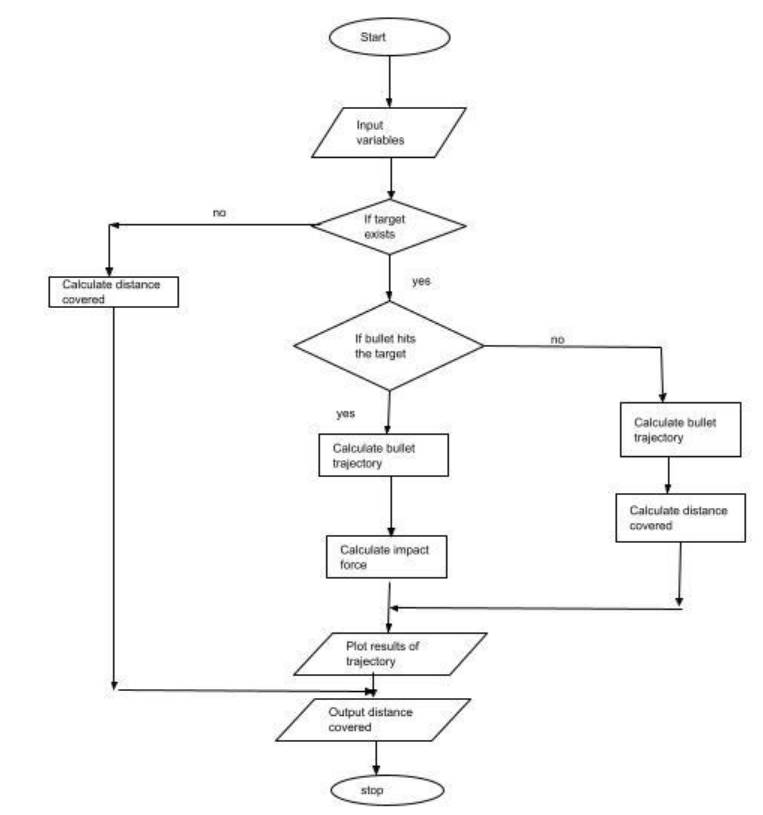

In [11]:
# Function to calculate the derivatives using the Runge-Kutta method
def calculate_derivatives(t, x, y, v, θ, wind_speed):
    wind_effect = wind_speed * math.cos(wind_direction - θ)
    dxdt = v * math.cos(θ) + wind_effect
    dydt = v * math.sin(θ)
    dvdt = -g * math.sin(θ) - 0.5 * air_density * v**2 * bullet_drag_coefficient * bullet_area / bullet_mass
    dθdt = -g * math.cos(θ) / v
    return dxdt, dydt, dvdt, dθdt

In [12]:
# Function to perform one step of the Runge-Kutta method
def runge_kutta_step(t, dt, x, y, v, θ, wind_speed):
    k1_x, k1_y, k1_v, k1_θ = calculate_derivatives(t, x, y, v, θ, wind_speed)
    k2_x, k2_y, k2_v, k2_θ = calculate_derivatives(t + dt/2, x + k1_x*dt/2, y + k1_y*dt/2, v + k1_v*dt/2, θ + k1_θ*dt/2, wind_speed)
    k3_x, k3_y, k3_v, k3_θ = calculate_derivatives(t + dt/2, x + k2_x*dt/2, y + k2_y*dt/2, v + k2_v*dt/2, θ + k2_θ*dt/2, wind_speed)
    k4_x, k4_y, k4_v, k4_θ = calculate_derivatives(t + dt, x + k3_x*dt, y + k3_y*dt, v + k3_v*dt, θ + k3_θ*dt, wind_speed)

    x = x + dt * (k1_x + 2*k2_x + 2*k3_x + k4_x) / 6
    y = y + dt * (k1_y + 2*k2_y + 2*k3_y + k4_y) / 6
    v = v + dt * (k1_v + 2*k2_v + 2*k3_v + k4_v) / 6
    θ = θ + dt * (k1_θ + 2*k2_θ + 2*k3_θ + k4_θ) / 6

    return x, y, v, θ

# Define a list to store the results and a list to store the simulations
results = []
simulations = []

In [13]:
for θ in firing_angles:
    for wind in wind_speeds:
        for target_distance in target_distances:
            x, y = 0, gun_height
            v = initial_bullet_velocity
            θ_temp = θ  # The firing angle
            t = 0  # Start time

            # Variables to store the trajectory of the bullet
            x_array = []
            y_array = []

            while y >= 0:
                x, y, v, θ_temp = runge_kutta_step(t, dt, x, y, v, θ_temp, wind)

                # Append the current x and y values to the trajectory arrays
                x_array.append(x)
                y_array.append(y)

                if target_distance - target_size/2 <= x <= target_distance + target_size/2 and 0 <= y <= target_size:
                    delta_t = 0.001
                    delta_p = bullet_mass * v
                    impact_force = delta_p / delta_t
                    results.append({
                        'firing_angle': θ,
                        'wind_speed': wind,
                        'target_distance': target_distance,
                        'impact_force': impact_force
                    })

                    # Store the trajectory for this simulation
                    simulations.append({
                        'firing_angle': θ,
                        'wind_speed': wind,
                        'target_distance': target_distance,
                        'x': x_array,
                        'y': y_array
                    })
                    break
                t = t + dt  # Update the time


Determing whether the bull

The terminal velocity of the bullet is 767.54162232729 m/s.
The maximum height reached by the bullet is 0.0 m.
The bullet lands with impact force is 89802 N which is enough to cause a concussion.


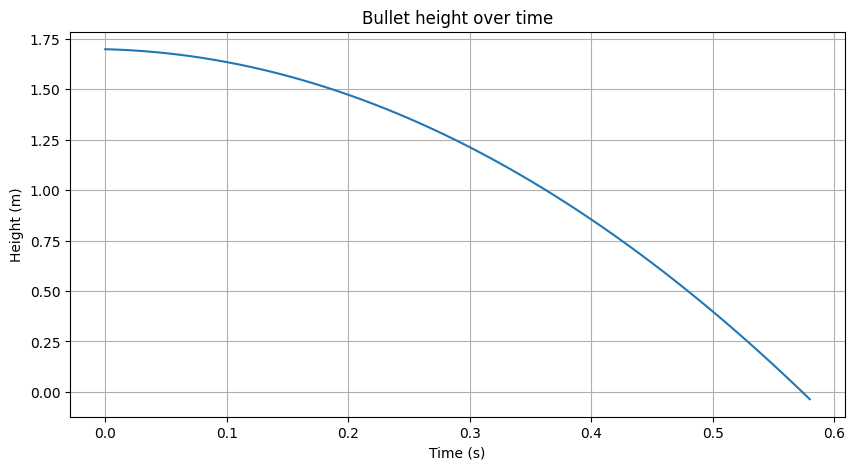

In [52]:
# Dermiming whether a bullet  fired into the air at angle θ has enough impact on landing to hurt a person.
# Plotting a grpah of the trajectory of the bullet depending on the angle of firing θ.

firing_angle_degrees = 0

firing_angle = math.radians(firing_angle_degrees)

# Calculate the bullet's cross-sectional area
bullet_area = math.pi * (bullet_diameter / 2)**2

# Function to calculate maximum height
def calculate_max_height(u, θ):
    return (u**2 * math.sin(θ)**2) / (2*g)

# Calculate the terminal velocity
terminal_velocity = math.sqrt((2*bullet_mass*g) / (bullet_drag_coefficient*air_density*bullet_area))

# Calculate the impact force

impact_time = 0.001  # seconds
impact_force = (bullet_mass * terminal_velocity) / impact_time

# Calculate maximum height
max_height = calculate_max_height(initial_bullet_velocity, firing_angle)

print(f"The terminal velocity of the bullet is {terminal_velocity} m/s.")
print(f"The maximum height reached by the bullet is {max_height} m.")

# Check if the impact force is above the concussion threshold
concussion_threshold = 980  # N

if impact_force > concussion_threshold:
    print(f"The bullet lands with impact force is {round(impact_force)} N which is enough to cause a concussion.")
else:
    print("The bullet does not land with enough force to cause a concussion.")

# Convert the initial velocity into x and y components
v_x = initial_bullet_velocity * math.cos(firing_angle)
v_y = initial_bullet_velocity * math.sin(firing_angle)

# Simulation
t = 0
y = 1.7
t_values = []
y_values = []

while y > 0:
    # Calculate acceleration due to air resistance
    a_y = -g - (0.5 * air_density * v_y**2 * bullet_drag_coefficient * bullet_area / bullet_mass)

    # Update velocity and position
    v_y = v_y + a_y*dt
    y = y + v_y*dt

    # Record time and height
    t_values.append(t)
    y_values.append(y)

    # Update time
    t = t + dt

# Create the plot
plt.figure(figsize=(10,5))
plt.plot(t_values, y_values)
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Bullet height over time')
plt.grid(True)
plt.show()



The maximum distance covered by the bullet is 214.330753047333 m, which was achieved with a wind speed of 2.0 m/s.
In order to be safe one should stand 214.330753047333m from the shooter in order to be safe.


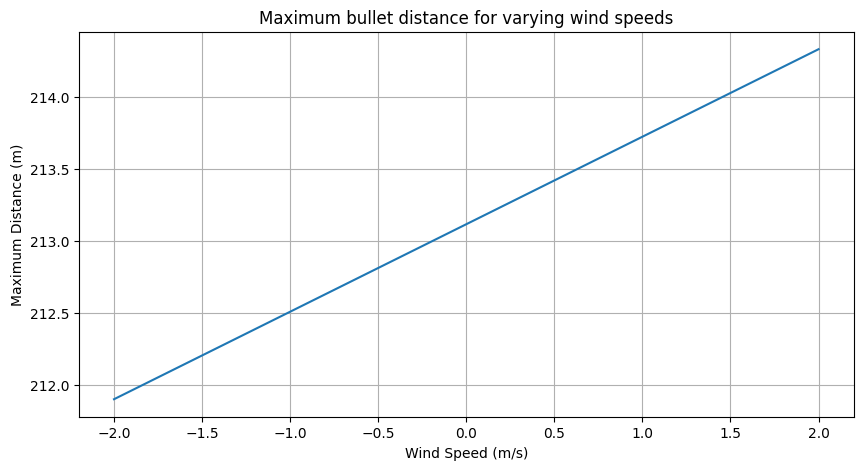

In [60]:
#Determing the maximum distance covered by the bullet, while varying wind speeds.
# Wind speeds to test
firing_angle = math.radians(0)
wind_speeds = np.linspace(-2, 2, num=10)  # sign of the windspeed represents the direction of the wind speed
max_distances = []

for wind_speed in wind_speeds:
    # Simulation
    dt = 0.01  # Time step
    t = 0
    v_x = initial_bullet_velocity * math.cos(firing_angle) + wind_speed  # Relative to the wind
    v_y = initial_bullet_velocity * math.sin(firing_angle)
    x = 0
    y = 1.8

    while y >= 0:
        # Calculate acceleration due to air resistance
        a_x = -np.sign(v_x) * (0.5 * air_density * abs(v_x)**2 * bullet_drag_coefficient * bullet_area / bullet_mass)
        a_y = -g - (0.5 * air_density * abs(v_y)**2 * bullet_drag_coefficient * bullet_area / bullet_mass)

        # Update velocity and position
        v_x = v_x + a_x*dt
        v_y = v_y + a_y*dt
        x = x + v_x*dt
        y = y + v_y*dt

        # Update time
        t = t + dt

    # Record maximum distance for this wind speed
    max_distances.append(x)

# Find the maximum distance and its corresponding wind speed
max_distance = max(max_distances)
max_distance_index = max_distances.index(max_distance)
corresponding_wind_speed = wind_speeds[max_distance_index]

print(f"The maximum distance covered by the bullet is {max_distance} m, which was achieved with a wind speed of {corresponding_wind_speed} m/s.")
print(f"In order to be safe one should stand {max_distance}m from the shooter.")

# Plot maximum distance as a function of wind speed
plt.figure(figsize=(10,5))
plt.plot(wind_speeds, max_distances)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Maximum Distance (m)')
plt.title('Maximum bullet distance for varying wind speeds')
plt.grid(True)
plt.show()


# 6.VERIFICATION
Checking whether input parameters and logical structures are correctly represented


##6.1 UNIT TEST

We test whether the values our calculate_derivatives() arrives at for specific input match the values expected from actual computation.

In [30]:
def test_calculate_derivatives():
    dxdt, dydt, dvdt, dθdt = calculate_derivatives(0, 0, 0, 350, math.radians(45), 0)
    assert math.isclose(dxdt, 247.4873, rel_tol=1e-2), f'Expected 247.4873, but got {dxdt}'
    assert math.isclose(dydt, 247.4873, rel_tol=1e-2), f'Expected 247.4873, but got {dydt}'
    assert math.isclose(dvdt, -8.9765, rel_tol=1e-2), f'Expected -8.976, but got {dvdt}'
    assert math.isclose(dθdt, -0.01981, rel_tol=1e-2), f'Expected -0.01981, but got {dθdt}'

test_calculate_derivatives()

# 7.VALIDATION

1. Check against known results: Find experimental data or perform experiments where you fire a bullet at known conditions and measure its trajectory and/or impact force, you can compare these measurements with the outputs of the simulation for the same conditions. The closer the outputs of the simulation to the experimental measurements, the better the simulation represents the real-world system.

2. Sensitivity analysis: Vary the input parameters (e.g., bullet mass, initial velocity, drag coefficient, wind speed) and check that the outputs of the simulation change in the expected way. For example, increasing the mass of the bullet should increase the impact force, while increasing the drag coefficient should decrease the range of the bullet.

3. Boundary conditions: Test the simulation with extreme values of the input parameters and check if it handles these extreme cases correctly. For example, with no gravity and no air resistance, the bullet should move in a straight line.

# 8.EXPERIMENTAL DESIGN
Designing an experiment using the bullet trajectory simulation involves setting up the conditions under which the simulation will run and determining the metrics to measure. Here is a basic experimental design for the bullet trajectory simulation.

## 8.1 Setting up parameters for the simulation

This code is setting up several variables to be used in a simulation. Here is what each one represents:

- `g`: This is the acceleration due to gravity, approximately
 9.81 m/s² on the surface of the Earth.

- `air_density`: This is the density of air at sea level at standard conditions (15 degrees Celsius and 1 atm pressure), measured in kg/m³. It is used in the calculation of the drag force experienced by the bullet.

- `gun_height`: This represents the height at which the gun (and thus the bullet initially) is above the ground, in meters.

- `initial_bullet_velocity`: This is the initial speed of the bullet as it leaves the muzzle of the gun, in meters per second.

- `bullet_mass`: The mass of the bullet, in kilograms.

- `bullet_diameter`: The diameter of the bullet, in meters.

- `bullet_drag_coefficient`: This is a dimensionless quantity that describes the bullet's resistance to airflow. It depends on the shape of the bullet and the roughness of its surface.

- `target_size`: The size of the target in meters. It's assumed to be a square target, so this value represents both the height and width.

- `bullet_area`: This is the cross-sectional area of the bullet (the area of a circle with the bullet's diameter), used in the calculation of the drag force. It's calculated using the formula for the area of a circle: πr², where r is the radius of the bullet (half the diameter).

- `wind_speeds`: This is an array of wind speeds to simulate, ranging from 0 to 20 m/s, with 10 evenly spaced values.

- `wind_direction`: This is the direction the wind is coming from, in radians. A value of 0 means the wind is blowing directly from the left of the firing range.

- `firing_angles`: This is an array of firing angles to simulate, ranging from 0 to 90 degrees, with 20 evenly spaced values. The angles are converted from degrees to radians because trigonometric functions in Python use radians.

- `dt`: This is the time step used for the numerical integration, in seconds. In numerical simulations like this one, the motion is typically updated in small discrete steps rather than continuously. The smaller the time step, the more accurate the simulation (but the more computations are required).





##8.2 Functions to calculate the bullet's trajectory
The function calculate_derivatives calculates the rate of change (derivative) of the bullet's position (x, y), velocity (v), and firing angle (θ) with respect to time (t), given the current state of these variables and the wind speed. These rates of change are needed to update the state of the system in each time step of the simulation.

Here's what each line does:

- wind_effect = wind_speed * math.cos(wind_direction - θ): This line calculates the effect of the wind on the horizontal motion of the bullet. The wind speed is multiplied by the cosine of the difference between the wind direction and the bullet's direction of travel. This essentially projects the wind speed onto the direction of the bullet's travel.

- dxdt = v * math.cos(θ) + wind_effect: This line calculates the rate of change of the bullet's horizontal position (x) with respect to time. It's given by the horizontal component of the bullet's velocity (v * cos(θ)) plus the wind effect.

- dydt = v * math.sin(θ): This line calculates the rate of change of the bullet's vertical position (y) with respect to time. It's given by the vertical component of the bullet's velocity (v * sin(θ)).

- dvdt = -g * math.sin(θ) - 0.5 * air_density * v**2 * bullet_drag_coefficient * bullet_area / bullet_mass: This line calculates the rate of change of the bullet's velocity with respect to time. The first term, -g * sin(θ), represents the component of gravitational acceleration that acts in the direction of the bullet's motion. The second term represents the drag force acting on the bullet due to air resistance, divided by the bullet's mass to give the acceleration. The drag force is proportional to the square of the velocity, the air density, the bullet's drag coefficient, and the bullet's cross-sectional area.

- dθdt = -g * math.cos(θ) / v: This line calculates the rate of change of the bullet's firing angle with respect to time. This rate of change is given by the gravitational acceleration acting perpendicular to the direction of the bullet's motion, divided by the bullet's speed. This represents the fact that gravity tends to bend the bullet's path downwards, changing the direction of motion.

- return dxdt, dydt, dvdt, dθdt: This line returns the calculated rates of change.


##8.3 Method to solve the differential equations
This is the completion of the ballistic simulation using the Runge-Kutta method, which is a numerical method used to solve differential equations. Here's a breakdown of what each part of the code is doing:

- runge_kutta_step: This function is an implementation of the 4th order Runge-Kutta method. The purpose of this function is to take a step forward in time in the simulation.

- The Runge-Kutta method is a method of numerically integrating ordinary differential equations by using a trial step at the midpoint of an interval to cancel out lower-order error terms. The 4th order Runge-Kutta method is the most common form of Runge-Kutta. Here it is applied to the system of ordinary differential equations defined by the calculate_derivatives function.

- The method involves taking four "trial" steps at various points throughout the time interval and combining them to form an overall solution. These trial steps (k1, k2, k3, k4) are calculated by the calculate_derivatives function.

- Once all four steps are calculated, the new values of x, y, v, and θ are updated using a weighted average of these steps, where the middle steps are weighted more heavily.

- results and simulations lists: These are empty lists that will store the results of the simulations and the detailed simulation data for each combination of parameters respectively.

- target_distances: This is a numpy array that contains evenly spaced values between 0 and 1000. These values represent the target distances that the simulation will test to see how the bullet trajectory changes. The simulation will run for each of these target distances, and for each combination of firing angle and wind speed defined earlier in the code.



8.4 Store the trajectory of the bullet
This is the main part of the simulation where it's iterating over all combinations of firing angles, wind speeds, and target distances to determine the trajectory of the bullet and whether it hits the target.

Here's a breakdown of the code:

- The outer three loops iterate over every combination of firing angle (θ), wind speed (wind), and target distance (target_distance).

- For each combination, it sets x and y to be the initial bullet position, v to be the initial bullet velocity, θ_temp to be the current firing angle, and t to be the start time.

- Two empty lists (x_array and y_array) are created to hold the trajectory of the bullet.

- The while loop runs the simulation for the given parameters. As long as y (the vertical position of the bullet) is greater than 0 (indicating the bullet is still in the air), it uses the runge_kutta_step function to update x, y, v, and θ_temp at each time step.

- The current x and y positions are appended to x_array and y_array to keep track of the bullet's trajectory.

- The if statement checks whether the bullet has hit the target. It considers a hit if the bullet is within the target's width (centred at target_distance) and within the target's height (from y=0 to y=target_size). If the bullet has hit the target, it calculates the impact force (impact_force) based on a simplified formula, assuming the change in momentum happens over a very small time period (delta_t). It then appends a dictionary to the results list that contains the parameters of the simulation and the calculated impact force.

- It also appends a dictionary to the simulations list that contains the parameters and the full trajectory of the bullet for that simulation (using x_array and y_array).

- Finally, if the bullet hasn't hit the target, it increments the time t by the time step dt and proceeds to the next iteration of the simulation.




8.5 Find the result with the highest impact force and  Filter the results and the simulations to only include those within a 50% range of the maximum conditions

In [15]:
# Find the result with the highest impact force
max_force_result = max(results, key=lambda r: r['impact_force'])

# Filter the results and the simulations to only include those within a 50% range of the maximum conditions
filtered_results = [data for data in results if data['impact_force'] > 0.5 * max_force_result['impact_force']]

# Extract relevant data for the filtered results
firing_angles_filtered = [math.degrees(data['firing_angle']) for data in filtered_results]
wind_speeds_filtered = [data['wind_speed'] for data in filtered_results]
target_distances_filtered = [data['target_distance'] for data in filtered_results]
impact_forces_filtered = [data['impact_force'] for data in filtered_results]

# 8.6 Plotting the results
This code is using the matplotlib library to generate three scatter plots that visualize how the impact force of the bullet is related to the firing angle, wind speed, and target distance.

Here's a breakdown of the code:

- fig, axs = plt.subplots(3, 1, figsize=(10, 15)): This creates a figure object (fig) and an array of three subplot axes (axs) arranged in 3 rows and 1 column. The size of the figure is set to be 10 inches wide and 15 inches tall.

- axs[0].scatter(firing_angles_filtered, impact_forces_filtered): This creates a scatter plot on the first subplot (index 0) with the firing angles on the x-axis and the corresponding impact forces on the y-axis.

- axs[0].set_xlabel('Firing angle (degrees)'): This sets the x-axis label of the first subplot to 'Firing angle (degrees)'.

- axs[0].set_ylabel('Impact force (N)'): This sets the y-axis label of the first subplot to 'Impact force (N)'.

- axs[0].set_title('Firing angle vs Impact force'): This sets the title of the first subplot to 'Firing angle vs Impact force'.

- The subsequent lines do the same for the second subplot (axs[1]), which is a scatter plot of wind speed versus impact force, and the third subplot (axs[2]), which is a scatter plot of target distance versus impact force.

- plt.tight_layout(): This adjusts the positions of the subplots so that there is sufficient space for the plot labels.

- plt.show(): This displays the figure with the three subplots.


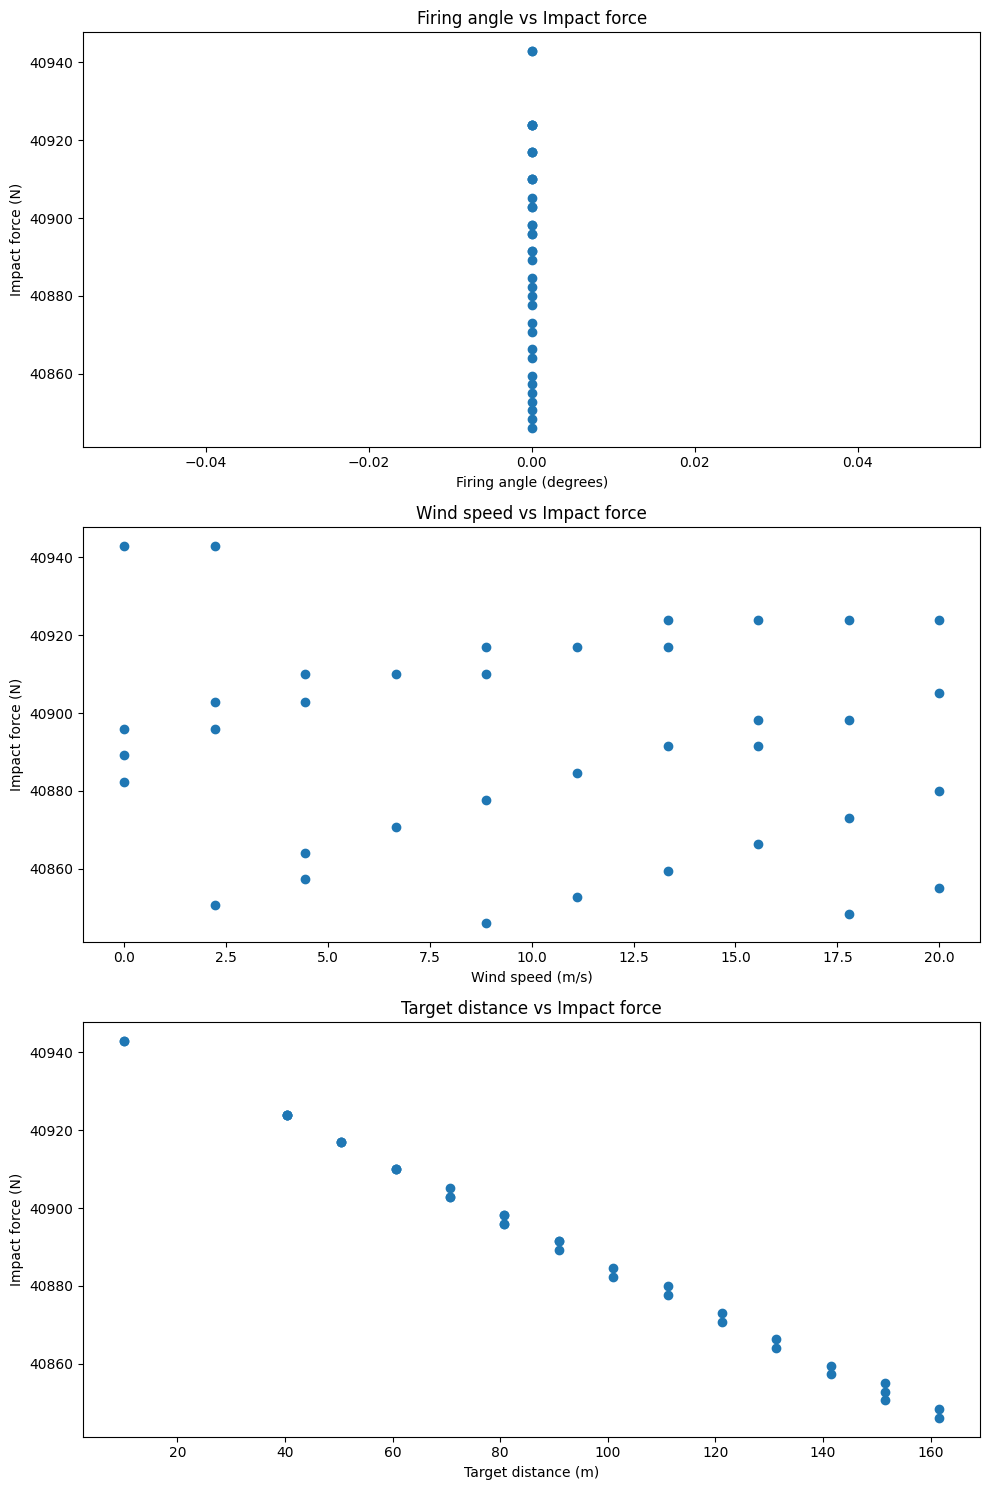

In [16]:
# Create plots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Firing angle vs impact force
axs[0].scatter(firing_angles_filtered, impact_forces_filtered)
axs[0].set_xlabel('Firing angle (degrees)')
axs[0].set_ylabel('Impact force (N)')
axs[0].set_title('Firing angle vs Impact force')

# Wind speed vs impact force
axs[1].scatter(wind_speeds_filtered, impact_forces_filtered)
axs[1].set_xlabel('Wind speed (m/s)')
axs[1].set_ylabel('Impact force (N)')
axs[1].set_title('Wind speed vs Impact force')

# Target distance vs impact force
axs[2].scatter(target_distances_filtered, impact_forces_filtered)
axs[2].set_xlabel('Target distance (m)')
axs[2].set_ylabel('Impact force (N)')
axs[2].set_title('Target distance vs Impact force')

# Display plots
plt.tight_layout()
plt.show()


## 8.7 Display maximum impact force of a certain firing angle, wind speed, target distance

In [17]:
print(f"The highest impact force was {max_force_result['impact_force']} N.")
print(f"It was achieved with a firing angle of {math.degrees(max_force_result['firing_angle'])} degrees, a wind speed of {max_force_result['wind_speed']} m/s, and a target distance of {max_force_result['target_distance']} m.")

The highest impact force was 40942.855804651816 N.
It was achieved with a firing angle of 0.0 degrees, a wind speed of 0.0 m/s, and a target distance of 10.1010101010101 m.


# 9. PRODUCTION RUNS AND ANALYSIS

#### First set of graphs
firing angle (degrees) against impact force

#### Second set of graphs
wind speed (m/s) against impact force

#### Third set of graphs
target distance against impact force

# 10. REFERENCES

Glock. (2020, March 17). Wikipedia. https://en.wikipedia.org/wiki/Glock

Kinematics equations. (2022, October 27). Wikipedia. https://en.wikipedia.org/wiki/Kinematics_equations

Carlucci, D. (2008). ‌‌Ballistics Theory and Design of Guns and Ammunition. Taylor & Francis Group, LLC